In [56]:
import pandas as pd
df = pd.read_excel(r'C:\bharath\DS\default.xlsx')

In [57]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [59]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [60]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [61]:
y = df['default payment next month']
df.drop(['default payment next month'],axis=1,inplace = True)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
x = rb.fit_transform(df)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state = 123,stratify = y)

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\bhara\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_predict = lr.predict(x_test)
lr.score(x_test,y_test)

0.8093333333333333

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,recall_score
print(confusion_matrix(y_test,y_predict))
print(recall_score(y_predict,y_test))

[[3426   79]
 [ 779  216]]
0.7322033898305085


In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3505
           1       0.73      0.22      0.33       995

    accuracy                           0.81      4500
   macro avg       0.77      0.60      0.61      4500
weighted avg       0.80      0.81      0.77      4500



No handles with labels found to put in legend.


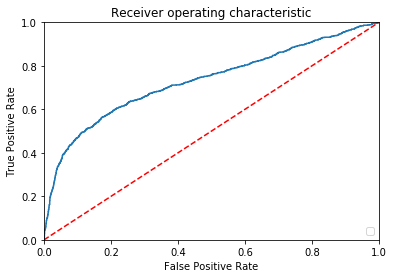

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score = roc_auc_score(y_test,lr.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,Label = 'Logistic Regression(area = %0.2f)' %logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7217777777777777

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
classifier.score(x_test,y_test)
print(recall_score(y_predict,y_test))
type(y_predict)

C:\Users\bhara\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.621031746031746


numpy.ndarray

In [74]:
#NULL VALUE METHOD
import numpy as np
y_predict = np.repeat(y_train.value_counts().idxmax(),y_test.size)
y_test
recall_score(y_true = y_test,y_pred = y_predict)

0.0